<a href="https://colab.research.google.com/github/MlodyKruczek/Bee_Bot/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autorzy: Więcek Patryk, Krukowski Michał

In [ ]:
!python -m spacy download pl_core_news_md

In [63]:
import spacy
import requests
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('parse_cfg')
import urllib.request
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
import matplotlib
import matplotlib.pyplot as plt
from spacy.lang.pl.examples import sentences 
import re
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
nltk.download('wordnet')

stop_w = ["a", "aby", "ach", "acz", "aczkolwiek", "aj", "albo", "ale", "ależ", "ani", "aż", "bardziej", "bardzo", "bo", "bowiem", "by", "byli", "bynajmniej", "być", "był", "była", "było", "były", "będzie", "będą", "cali", "cała", "cały", "ci", "cię", "ciebie", "co", "cokolwiek", "coś", "czasami", "czasem", "czemu", "czy", "czyli", "daleko", "dla", "dlaczego", "dlatego", "do", "dobrze", "dokąd", "dość", "dużo", "dwa", "dwaj", "dwie", "dwoje", "dziś", "dzisiaj", "gdy", "gdyby", "gdyż", "gdzie", "gdziekolwiek", "gdzieś", "go", "i", "ich", "ile", "im", "inna", "inne", "inny", "innych", "iż", "ja", "ją", "jak", "jakaś", "jakby", "jaki", "jakichś", "jakie", "jakiś", "jakiż", "jakkolwiek", "jako", "jakoś", "je", "jeden", "jedna", "jedno", "jednak", "jednakże", "jego", "jej", "jemu", "jest", "jestem", "jeszcze", "jeśli", "jeżeli", "już", "ją", "każdy", "kiedy", "kilka", "kimś", "kto", "ktokolwiek", "ktoś", "która", "które", "którego", "której", "który", "których", "którym", "którzy", "ku", "lat", "lecz", "lub", "ma", "mają", "mało","mam", "mi", "mimo", "między", "mną", "mnie", "mogą", "moi", "moim", "moja", "moje", "może", "możliwe", "można", "mój", "mu", "musi", "my", "na", "nad", "nam", "nami", "nas", "nasi", "nasz", "nasza", "nasze", "naszego", "naszych", "natomiast", "natychmiast", "nawet", "nią", "nic", "nich", "nie", "niech", "niego", "niej", "niemu", "nigdy", "nim", "nimi", "niż", "no", "o", "obok", "od", "około", "on", "ona", "one", "oni", "ono", "oraz", "oto", "owszem", "pan", "pana", "pani", "po", "pod", "podczas", "pomimo", "ponad", "ponieważ", "powinien", "powinna", "powinni", "powinno", "poza", "prawie", "przecież", "przed", "przede", "przedtem", "przez", "przy", "roku", "również", "sam", "sama", "są", "się", "skąd", "sobie", "sobą", "sposób", "swoje", "ta", "tak", "taka", "taki", "takie", "także", "tam", "te", "tego", "tej", "temu", "ten", "teraz", "też", "to", "tobą", "tobie", "toteż", "trzeba", "tu", "tutaj", "twoi", "twoim", "twoja", "twoje", "twym", "twój", "ty", "tych", "tylko", "tym", "u", "w", "wam", "wami", "was", "wasz", "wasza", "wasze", "we", "według", "wiele", "wielu", "więc", "więcej", "wszyscy", "wszystkich", "wszystkie", "wszystkim", "wszystko", "wtedy", "wy", "właśnie", "z", "za", "zapewne", "zawsze", "ze", "zł", "znowu", "znów", "został", "żaden", "żadna", "żadne", "żadnych", "że", "żeby"]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading parse_cfg: Package 'parse_cfg' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...


##Artykuly

In [ ]:
#kosmos
art1 = 'Okruch pyłu, który oderwał się z ogona komety 350 mln km stąd, w końcu wylądował pod mikroskopem elektronowym. Powiększenie rośnie, drobina wypełnia ekran. Dave Joswiak pokazuje fragment, który przypomina wyszczerbiony klif, i podkręca powiększenie do 900 tys. razy. Ukazują się nam malutkie kruczoczarne ziarna. – Niektóre mają ledwie kilka nanometrów – mówi Joswiak. – Sądzimy, że to próbka pierwotnego materiału, z którego powstał cały Układ Słoneczny. Drobina pyłu ma nawet imię, Inti, jak bóg słońca Inków. Prawdopodobnie ostatnie 4,5 mld lat spędziła mocno zmrożona wewnątrz komety Wild 2 poza Neptunem. Dziesiątki lat temu Wild 2 z nieznanych powodów wpadła na orbitę, która wysłała ją bliżej Słońca. A kometa zaczęła się rozpadać w jego cieple.Jej fragmenty wciągnęła przelatująca obok Wild 2 w styczniu 2004 r. sonda NASA Stardust. Tysiące drobin pyłu złapała w pułapkę z aerożelu – piankowej substancji wyglądem przypominającej zmrożony dym. Dwa lata później kapsuła z tym delikatnym ładunkiem wylądowała na pustyni Utah. Badacze z zespołu Stardust wydobyli drobiny z żelu i ułożyli je pod mikroskopami elektronowymi. To, co zobaczyli, zrobiło na nich ogromne wrażenie. Naukowcy od dawna wiedzieli, że ciała krążące wokół Słońca powstały 4,5 mld lat temu z pyłu i gazu wirującego w mgławicy słonecznej o kształcie dysku. Długo sądzono, że obiekty teraz znajdują się mniej więcej tam, gdzie się uformowały. Za Neptunem, gdzie tworzyły się komety, dostępna była mieszanka lodu i bogatego w węgiel puchatego pyłu. Tymczasem ziarna Inti zawierają inne substancje: twarde fragmenty skał, wolfram, azotek tytanu. One mogły powstać jedynie w pobliżu nowo narodzonego Słońca, w temperaturze ponad 1700 st. C. W historii Układu Słonecznego musiało więc wydarzyć się coś gwałtownego, co wypchnęło te substancje dalej od naszej gwiazdy. – Byliśmy zdumieni – przyznaje Donald Brownlee, kierownik zespołu Stardust.  – Znaleźliśmy cząstki kojarzone z wysokimi temperaturami w najzimniejszych obiektach Układu Słonecznego. Taki wniosek wywraca jego historię do góry nogami. Układ Słoneczny jeszcze do niedawna cieszył się opinią przewidywalnego. – Miał dziewięć planet o regularnych orbitach, po których krążą jak w zegarku – mówi Renu Malhotra z University of Arizona. – Od zawsze i na zawsze. W planetarium możemy zobaczyć urządzenia mechaniczne, które pokazują ruch planet według Izaaka Newtona. Pod koniec XVII w. uznał on, że sposób ich poruszania się można wyliczyć z grawitacyjnego oddziaływania ze Słońcem. Wkrótce zegarmistrzowie zaczęli budować ruchome schematy Układu Słonecznego, w których mosiężne planety krążyły po stałych ścieżkach. Newton zdawał sobie jednak sprawę, że rzeczywistość jest bardziej skomplikowana. Że planety oddziałują nie tylko ze Słońcem, ale też wzajemnie ze sobą. Ta siła przyciągania jest znacznie słabsza niż pochodząca od gwiazdy. ale gdy małe zmiany kumulują się przez długi czas, zaczynają mieć znaczenie. Efekt?  –  Żadna z planet nie porusza się po okręgu – mówi Brownlee. Orbity planet zaczynają się wydłużać, krzyżują się ze sobą, rozregulowują. Newton twierdził, że najwyraźniej od czasu do czasu do akcji musi wkroczyć Bóg i naprawić ten zegar. Nie potrafił tylko obliczyć, kiedy. Nawet on nie był w stanie porachować, jak wzajemne oddziaływania planet wpłyną na kształt ich orbit w dalekiej przyszłości. Nikt jednak nigdy nie widział dowodu, że orbity kiedykolwiek się zmieniły. Na początku obecnego wieku zaczął się jednak wyłaniać inny obraz naszej najbliższej kosmicznej okolicy. Po doniesieniach zespołu Stardust wielu naukowców zaczęło uważać, że wczesna młodość Układu Słonecznego rzeczywiście mogła być gwałtowna. Planety setki milionów lat po uformowaniu przeniosły się na nowe orbity, wyrzucając znajdujące się na ich drodze fragmenty skał i komet.  – Kto by pomyślał, że ogromne planety mogły się tak przemieścić? Że Układ Słoneczny tak się zmienił? – pyta Alan Stern z Southwest Research Institute w Boulder w Kolorado. – Były przesłanki, które to sugerowały. Aby je potwierdzić, trzeba było jednak zrobić nowe obserwacje teleskopowe, opracować cyfrowy model układu planet. I zaprząc do pracy komputery, by policzyły orbity dawne i obecne. Pierwsze spostrzeżenia nasunęły się z badań Plutona, małego dziwoląga Układu Słonecznego (który już nie jest uznawany za planetę). Jego orbita jest znacznie przekrzywiona w stosunku do orbit ośmiu planet oraz silnie wydłużona. Mierzy 30–50 odległości Ziemia–Słońce, czyli jednostek astronomicznych. Najdziwniejszy okazał się związek Plutona z Neptunem. Są w tak zwanym rezonansie orbitalnym. W czasie gdy Neptun okrąża Słońce trzy razy, Pluton obiega je dwukrotnie. Planety wykonują ten taniec tak, by nigdy się do siebie nie zbliżyć.  W 1993 r. Renu Malhotra wymyśliła, jak ta doskonała synchronizacja mogła powstać. Gdy Układ Słoneczny był jeszcze młody, pełen planetoid i komet, Neptun znajdował się bliżej Słońca niż dziś. Jeśli któryś z tych drobnych obiektów zbliżył się do Neptuna, siła grawitacyjna planety mogła albo ściągnąć go bliżej Słońca, albo wystrzelić poza Układ Słoneczny. Ponieważ akcja zawsze wywołuje reakcję, każde takie wydarzenie trochę zmieniało orbitę planety. Model komputerowy opracowany przez Malhotrę wykazał, że oddziaływania te faktycznie spowodowałyby oddalanie się Neptuna od Słońca. Z komputerowych obliczeń wynika też, że Neptun przechwycił oddalającego się Plutona i wciągnął go w grawitacyjny taniec. Malhotra po 10 latach badań dowiodła swojej racji. W Pasie Kuipera, ciemnym obszarze daleko za Neptunem, teleskopy wykryły wiele tzw. plutoid – planet karłowatych będących w rezonansie dwa do trzech z Neptunem.– To mogło się wydarzyć, tylko gdy Neptun przesuwał się w kierunku Pasa Kuipera, jak grawitacyjny pług śnieżny ściągający planety karłowate na nowe orbity – twierdzi badaczka. – Gdy plutoidy zostały odkryte, wszystko się wyjaśniło, a migracja planet w zasadzie stała się podręcznikową teorią. Zbiegło się to w czasie z innymi odkryciami w Układzie Słonecznym. Na początku XXI w. naukowcy już wiedzieli, że jego powstawanie było gwałtowne. Planety nie tworzyły się spokojnie z mgławicy słonecznej. Nabierały rozmiarów, wchłaniając inne planetozymale – skaliste planetoidy, lodowe komety i większe obiekty, które roztrzaskiwały się na ich powierzchni. Trwało to prawdopodobnie przez pierwsze 100 mln lat. Zagadką było, dlaczego po pewnym czasie te gwałtowne wydarzenia nie skończyły się raz na zawsze. Setki milionów lat później Księżyc przyjął bowiem wiele kolejnych uderzeń, których ślady widać na jego powierzchni. To tzw. Wielkie Bombardowanie dla Ziemi powinno być jeszcze dotkliwsze. Naukowcy nie wiedzą, co je wywołało. Od tego czasu planety poruszają się po orbitach niemal całkiem wolnych od szczątków.Podobną zagadkę wykryły teleskopy w Pasie Kuipera. Między plutoidami znajduje się mnóstwo innych obiektów. Niektóre zgromadziły się w płaski dysk, inne w chmurę w kształcie ciastka z dziurką, a jeszcze inne krążą po bardziej nawet wydłużonych orbitach niż Pluton. Gładkie przesunięcie się Neptuna, którym Malhotra wyjaśniła obecność plutoidów, nie rozrzuciłoby szczątków tak szeroko. Tymczasem astronomowie zaczęli odkrywać w kosmosie egzoplanety – planety krążące dokoła innych gwiazd. Obserwacje te mocno poszerzyły wiedzę o tym, jak może wyglądać układ planetarny. Orbity niektórych są ciasne, dużo mniejsze niż w naszym Układzie Słonecznym. Są też wiszące samotnie w przestrzeni międzygwiazdowej. Levison, na którego znajomi mówią Hal, to krzepki siwiejący mężczyzna z włosami związanymi w kucyk. – To, co teraz powiem, będzie szalone – tymi słowami zaczął seminarium. Pewnie powiedział to samo w 2004 r., gdy prezentował tzw. model nicejski opracowany na podstawie wielu symulacji komputerowych. Model ów zakłada, że zewnętrzne planety Układu Słonecznego – Jowisz, Saturn, Uran i Neptun – na początku były znacznie bliżej siebie niż obecnie (ostatnie trzy także bliżej Słońca), a ich orbity miały kształt bliski okręgu. Krążyły wtedy razem z mnóstwem skalnych i lodowych odłamków tworzących mgławicę słoneczną. Po jakimś czasie planety wchłonęły lub wysłały planetozymale w kosmos. Teren się oczyścił. Planety przyciągały siebie wzajemnie, układ był bardzo delikatny, „niemal chaotyczny”, mówi Levison. Planety oprócz oddziaływania grawitacyjnego ze Słońcem, które można porównać do krążenia w kieracie, zachowywały się, jakby dodatkowo między sobą były połączone sprężynami. Najsilniejsze przyciąganie łączyło dwa największe ciała – Jowisza i Saturna. Zerwanie tej więzi mogłoby dokonać rewolucji w układzie wszystkich planet. To właśnie stało się, jak przypuszczają badacze, gdy Układ Słoneczny miał 500–700 mln lat. Oddziaływania z planetozymalami zmodyfikowały orbity planet: Jowisz przesunął się nieco do środka układu, Saturn, Uran i Neptun – trochę na zewnątrz. Wszystko działo się powoli, aż do chwili, gdy Saturn znalazł się w takim położeniu, że wykonuje jedno pełne okrążenie na każde dwa okrążenia Jowisza wokół Słońca. Ten rezonans zwany „jeden do dwóch” nie był tak stabilny jak związek między Neptunem i Plutonem. Gdy Jowisz i Saturn regularnie się zbliżały, przyciągając się do siebie, ich niemal okrągłe orbity zaczynały się wyciągać i tworzyć elipsy, które obserwujemy obecnie. To wkrótce zakończyło się rezonansem. Zanim jednak do tego doszło, Saturn przysunął się wystarczająco blisko Urana i Neptuna, by je przyspieszyć. W efekcie te dwie planety wyskoczyły na zewnątrz. W mniej więcej połowie symulacji komputerowych nicejskiego zespołu zamieniły się nawet miejscami. Gdy Uran i Neptun krążyły po orbitach Układu Słonecznego pełnego lodowatych planetozymali, wywołały lawinę zniszczeń. Kule lodowe były katapultowane we wszystkich kierunkach. Planety łapały księżyce krążące po dziwnych orbitach. Wiele obiektów – pewnie także kometa Wild 2 – zostało wystrzelonych do Pasa Kuipera. Nieznana ich liczba, być może bilion, została wypchnięta daleko, nawet poza Obłok Oorta. To obiekt w kształcie rozległego kokonu, który znajduje się w połowie drogi do następnej gwiazdy. Wiele komet zostało też rzuconych do środka układu, gdzie albo zderzyły się z planetami, albo rozpadły w cieple Słońca. Migracje wielkich planet zniszczyły też pas planetoid między Jowiszem a Marsem. Rozproszone dołączyły do komet i przyczyniły się do Wielkiego Bombardowania. Misja NASA zwana GRAIL pokazuje, jak bardzo Księżyc ucierpiał wówczas i wcześniej. Jego powłoka jest mocno pobrużdżona. Ziemia pewnie zebrała więcej ciosów, lecz ślad po nich zaginął – ruch płyt tektonicznych wymazał ogromne kratery. Wielkie Bombardowanie zaczęło słabnąć po 100 mln lat, jak sugerują wyliczenia modelu nicejskiego. Jednak z badań Billa Bottke z Southwest Research Institute wynika, że częste impakty mogły utrudniać rozwój życia przez kolejne 2 mld lat.Gdy planetoida uderza w Ziemię, wysoko w jej atmosferze tworzą się krople roztopionej skały, które później spadają w postaci twardych, szklistych kuleczek zwanych sferulami. Teraz naukowcy na całym świecie odnajdują sferule powstałe po uderzeniu planetoidy w Jukatan 65 mln lat temu, które zmiotło z powierzchni Ziemi dinozaury. Na razie odkryto też co najmniej kilkanaście podobnych sferuli będących świadectwem impaktów z okresu 1,8–3,7 mld lat temu. Bottke twierdzi, że w naszą planetę uderzyło nawet 70 planetoid porównywalnych do tej, która wyeliminowała dinozaury. – Ewolucja Układu Słonecznego była naprawdę dynamiczna – mówi Levison. – Jednak to chyba i tak drobiazg w porównaniu z tym, co dzieje się gdzie indziej w kosmosie. Prawdopodobnie ta odrobina kosmicznej łagodności jest niezbędna do tego, by na planecie powstało życie. Model nicejski to tylko hipoteza. Nie wszyscy naukowcy są przekonani, że słuszna. Badacze sprawdzają ją, tworząc mapy. Rysowanie układów odległych obiektów kosmicznych powinno pokazać, czy i jak planety się tam zachowywały. Stern prowadzi w NASA misję New Horizons, która zbadała Plutona i jego księżyce. Uczeni przekierowali sondę tak, by zbadała co najmniej jeden obiekt w Pasie Kuipera. Nowe teleskopy powinny pozwolić nam przyjrzeć się dużo bardziej oddalonym obiektom w Pasie Kuipera. Może też zajrzą do Obłoku Oorta, który Stern nazywa strychem Układu Słonecznego. Wśród obiektów, które zostały wyrzucone tam przez Jowisza, mogą być zaginione planety. – Sądzę, że zdjęcia z Obłoku Oorta pokażą, że jest on wypełniony planetami. Myślę, że znajdziemy tam wiele marsów i ziem – mówi Stern. Jak rysuje się przyszłość planet, które znamy? – Wiele dzieje się tu przypadkiem – mówi Greg Laughlin z University of California w Santa Cruz. Naukowcy sądzą, że cztery wielkie planety zakończyły tułaczkę i za 5 mld lat będą na tych samych orbitach co dziś. Wtedy starzejące się Słońce rozedmie się i pochłonie je. Nie ma jednak pewności, czy Merkury, Wenus, Ziemia i Mars wciąż będą w pobliżu, by poddać się zagładzie. '

art2 = 'Mars ma dwóch naturalnych satelitów. Mniejszy to Deimos, większy Fobos. Ten drugi przypomina ogromnego ziemniaka z gigantycznym wgłębieniem na jednym końcu. Długość Fobosa, nazwanego imieniem syna Afrodyty i Aresa, wynosi zaledwie 27 km. Fobos okrąża Marsa w bardzo szybkim tempie. Pełne okrążenie zajmuje mu tylko 7 godzin i 39 minut. W ciągu marsjańskiego dnia księżyc ten wschodzi dwa razy i dwa razy zachodzi. Znajduje się bardzo blisko macierzystej planety – ledwie 6 tys. km nad nią. Mars przyciąga go tak mocno, że co roku Fobos przybliża się do niego o niemal 2 centymetry. Krater na Fobosie i tygrysie pasy W latach 70. XX wieku Fobosa sfotografowała sonda Viking. Okazało się wówczas, że większy z księżyców Marsa kryje pewną niespodziankę. Na fotografiach naukowcy zobaczyli wyraźne długie żłobienia, układające się na powierzchni ciała niebieskiego w równoległych rzędach. Mają 100–200 metrów szerokości i nawet 20 km długości. Jak powstały? Pierwsza hipoteza głosiła, że są efektem uderzenia, w wyniku którego na Fobosie powstawał krater Stickney. Jest on tak gigantyczny, że według przypuszczeń zderzenie prawie doprowadziło do rozpadnięcia się Fobosa. Jednak gdyby żłobienia stanowiły pozostałość po tej katastrofie, odchodziłyby promieniście z krateru – a tak nie jest. Fobos się rozpadaW 2015 r. zespół Terry’ego Hurforda z NASA przedstawił inną teorię. Według nich rowy na powierzchni księżyca są pierwszą oznaką jego nadchodzącej śmierci. Fobos ma przed sobą bowiem najwyżej kilkadziesiąt milionów lat życia. Różne szacunki podają wielkości od 50 do 100 mln lat. Po tym okresie zostanie dosłownie rozerwany przez siły pływowe – czyli przez grawitację Marsa. Zamieni się wówczas w kupę kosmicznego gruzu, który może utworzyć wokół Marsa pierścień. Wówczas dołączyłby on znów do grona planet z pierścieniami. Czy jednak siły pływowe mogą w widoczny sposób działać na Fobosa już teraz? Twierdzącej odpowiedzi dostarczył właśnie kolejny zespół naukowców. Astronomowie pracujący pod kierunkiem Bina Chenga opracowali model 3D Fobosa. Sprawdzili, co mogłoby się dziać z tym księżycem pod wpływem grawitacji. Wnioski opublikowali w czasopiśmie naukowym „The Planetary Science Journal”.Co to są siły pływowe?Wyjaśnienie Ziemianinowi, co to są pływy, nie jest sprawą trudną. Nasz planeta pokryta jest w większości płynnym oceanem. Jego masy przesuwają się pod wpływem oddziaływania grawitacyjnego wywieranego przez Księżyc. Od wieków obserwowaliśmy przypływy i odpływy, słusznie przypisując je wpływowi Księżyca. Jednak siły pływowe mogą również działać na ciała niebieskie o stałej powierzchni. Zwłaszcza gdy – tak jak w przypadku Fobosa – nie jest ono wcale monolitem. Naukowcy założyli, że księżyc ten ma budowę warstwową. Wewnątrz składa się z kosmicznego gruzu: potężnych głazów scalonych grawitacją. Warstwę tę pokrywa podobny do księżycowego sproszkowany regolit stumetrowej grubości. Zespół Bina Chenga przyjął, że również ta warstwa składa się z dwóch części, z bardzo luźnej zewnętrznej i nieco bardziej zwartej poniżej. Następnie badacze przeprowadzili setki symulacji. Wykazały one, że siły pływowe działające na tak zbudowany księżyc mogą doprowadzić do powstania żłobień. Właśnie takich, jakie widoczne są na zdjęciach Fobosa. „Powstawanie pęknięć spowoduje zsypywanie się luźnego materiału z powierzchni do środka głębokich dolin. A to – jak wykazujemy – mogło doprowadzić do uformowania się struktur przypominających rowy” – napisali badacze w swojej pracy. Co ciekawe, rozerwanie powierzchni ciała niebieskiego pod wpływem grawitacji zaszło najprawdopodobniej również na Enceladusie. To z kolei księżyc Saturna. Fobos zostanie zbadany przez japońską sondę Czy nowe badania zamykają temat pasów na Fobosie? Nie do końca. Naukowcy przyznają, że ich model nie wyjaśnił powstawania pasów w okolicach równika tego księżyca. Być może uda się to dopiero zrobić, gdy zakończy się misja japońskiej agencji kosmicznej JAXA.Sonda Martian Moon eXploration (MMX) ma badać oba księżyce Marsa i przywieźć próbki z Fobosa na Ziemię. Start misji został zaplanowany na 2024 r.'

#natura
art3 = 'W 2006 roku Jim Martell, myśliwy z Idaho, polował na Wyspie Banksa leżącej w Archipelagu Arktycznym. 16 kwietnia zastrzelił w pobliżu osady Sachs Harbour niedźwiedzia, którego wziął za zwykłego niedźwiedzia polarnego. Zwierzęciem zainteresowały się jednak władze. Niedźwiedź, choć na pierwszy rzut oka wyglądał jak typowy wielki ssak z najdalszej północy, miał też długie pazury, płaski pysk, brązowawe futro wokół oczu, nosa i na łapach. Czyli cechy anatomiczne grizzly. Ponieważ za upolowanie grizzly groziła kara 1000 dolarów kanadyjskich i rok więzienia, ustalenie przynależności gatunkowej zwierzęcia stało się ważne dla wszystkich zainteresowanych stron. Testy DNA niedźwiedzia przeprowadzono w Kolumbii Brytyjskiej. Okazało się, że Martell zabił hybrydę – dzikiego niedźwiedzia będącego krzyżówką grizzly i niedźwiedzia polarnego. Wiadomo było, że te dwa gatunki można krzyżować w niewoli. Jednak nigdy wcześniej nie spotkano ich potomstwa na wolności. W kolejnych latach przybywało doniesień o napotykaniu – i zabijaniu – kolejnych zwierząt pochodzących od grizzly i niedźwiedzi polarnych. Do dzisiaj zidentyfikowano kolejne osiem hybryd. Cztery miały równe domieszki obu gatunków. W przypadku czterech pozostałych ich matka była hybrydą, ojcem zaś niedźwiedź grizzly. Ogólnie przylgnęła do nich nazwa pizzly albo gloral bears (z połączenia słów „polar” i „grizzly”). Zdaniem badaczy za pojawienie się tych hybrydy niedźwiedzi odpowiadają zmiany klimatyczne. Są one szczególnie niebezpieczne dla niedźwiedzi polarnych. Rok temu naukowcy z Uniwersytetu Vanderbilta przestrzegali, że w ciągu najbliższych 30 lat populacja niedźwiedzi polarnych zmniejszy się aż o jedną trzecią. Inni wieszczą, że do końca tego wieku niedźwiedzie polarne mogą w ogóle zniknąć z powierzchni Ziemi. Topnienie lodu morskiego w Arktyce sprawia, że niedźwiedzie polarne mają problem z dostępem do żywności. Zwierzęta te mają bardzo wyspecjalizowaną dietę: żywią się mięsem i tłuszczem, głównie fok. Gdy ich naturalne tereny łowieckie się kurczą, w poszukiwaniu pożywienia wędrują na południe. Z kolei ich kuzyni z południa – wszystkożerne niedźwiedzie brunatne – w miarę ocieplania się klimatu przesuwają się coraz bardziej na północ. Oba gatunki niedźwiedzi, dawniej żyjące w oddzielnych środowiskach, zaczynają się spotykać i krzyżować. Zjawisko to, udokumentowane dla północnych rejonów Kanady i USA, dotyczy także północnych regionów Azji. Badacze z Syberii donoszą, że zauważyli przesuwanie się niedźwiedzi brunatnych coraz bardziej na północ. Widziano je już nad rzeką Kołymą w Jakucji, a także w ułusie anabarskim. Czyli w rejonach, gdzie wcześniej obserwowano niedźwiedzie polarne. – Jest prawdopodobne, że w przyszłości zobaczymy krzyżówki niedźwiedzia polarnego i brunatnego – powiedział jeden z badaczy. Zmiana habitatów zwierząt na Syberii wiąże się, jak wszędzie, z ocieplaniem się klimatu. Badacze z Instytutu Badań nad Wieczną Zmarzliną przeanalizowane dane z 52 stacji meteorologicznych w Jakucji z ostatnich 50 lat. W tym okresie średnia temperatura w regionie wzrosła między 1,1o a 3,4o C (w zależności od miejsca). Wzrost średniej temperatury był spowodowany przede wszystkim cieplejszymi zimami. Czy w przyszłości z potomstwa niedźwiedzi polarnych i brunatnych wyłoni się nowy gatunek tych zwierząt? Niektórzy naukowcy twierdzą, że jest to możliwe. Krzyżówki niedźwiedzi są płodne i mogą mieć własne potomstwo. Co więcej, jeśli podstawą ich diety nie będzie wyłącznie mięso, hybrydy mogą wyprzeć niedźwiedzie polarne z terenów dalekiej północy. Jednak nie jest to pewne. – Zwykle hybrydy nie są lepiej przystosowane do swojego środowiska niż ich rodzice – zauważyła w zeszłym roku Larisa DeSantis, paleontolożka i biolożka w Uniwersytetu Vanderbilta. Dr Andrew Derocher, biolog z kanadyjskiego Uniwersytetu Alberta, też ma wątpliwości. – Moim zdaniem nie pojawi się nowy gatunek, tylko do DNA grizzly trafi trochę genów niedźwiedzi polarnych – powiedział naukowiec cztery lata temu w wywiadzie dla Focus BBC. '

art4 = 'O tym, że owady odczuwają ból, mówi się od pewnego czasu. W 2019 roku opublikowano nawet badania nad chronicznym bólem odczuwanym przez bardzo proste organizmy, takie jak muszki owocówki. Został on zaobserwowany u osobników, które straciły kończyny. I chociaż reakcja neurologiczna na ból stosunkowo prostych organizm jest bardzo ciekawa, to jednak mieści w granicach pewnych automatyzmów.Zupełnie inaczej ma się sprawa z zabawą. Ta wydawała się zarezerwowana dla organizmów o wysokim stopniu złożoności i rozwiniętym układzie nerwowym. Jednak nowe badania przeprowadzone na trzmielach sugerują, że zapylacze mogą odczuwać przyjemność z czynności w żaden sposób nie wpływających na ich życie i przetrwanie.– Pomimo niewielkich rozmiarów i maleńkich mózgów, owady są czymś więcej niż małymi robotycznymi istotami – twierdzi doktorantka Samadi Galpayage, ekolożka behawioralna z Uniwersytetu Królowej Marii w Londynie (QMUL). – Zaczynamy rozpoznawać elementy bogatego sensorycznie i poznawczo życia prowadzonego przez owady zapylające.Galpayage i jej współpracownicy stworzyli coś w rodzaju placu zabaw dla 45 trzmieli ziemnych. W jednej części kompleksu ustawiono coś, co można określić mianem „szwedzkiego stołu” dla zapylaczy. W drugiej – tor przeszkód składający się z niewielkich, drewnianych kuleczek.Trzmiele mogły dostać się do żerowiska dwoma drogami. Albo bezpośrednią, albo poprzez tor przeszkód. Wydawałoby się, że po krótkim rozpoznaniu wybiorą najprostszy sposób dostania się do pokarmu. Jednak ku ogromnemu zaskoczeniu badaczy – wolały tor przeszkód.Trzmiele przesuwały, toczyły i „kopały” swoje piłki. Każdy z nich „rzucił” kulkami do 117 razy w całym okresie eksperymentu, nie wykazując preferencji między różnymi kolorami. Co najbardziej zaskakujące, trzmiele wracały na swój plac zabaw nawet po zakończeniu eksperymentu i zamknięciu żerowiska. To tym jaśniej pokazywało, że nie robiły tego dla nagrody.– Raz po raz podchodziły do swoich „zabawek” i manipulowały nimi – wyjaśnia Galpayage. – Wydaje się, że mogą doświadczać pewnego rodzaju pozytywnych stanów emocjonalnych, nawet jeśli są one szczątkowe, w porównaniu z większymi, wyżej zorganizowanymi zwierzętami.Należy zaznaczyć, że właśnie odczuwanie przyjemności jest tym, co wzmacnia nasze własne zachowania związane z zabawą. Rzecz jasne zabawa ma też pewien cel praktyczny. Pomaga doskonalić nasze umiejętności poznawcze i motoryczne.Czy jednak toczenie drewnianych kuleczek może przynieść trzmielom jakąś wymierną korzyść? Zdaniem naukowców może rozwijać zręczność potrzebną do wydobywania nektaru z kwiatów. Co ciekawe, nowe badania wykazały, że to młode trzmiele bawią się najchętniej. Zupełnie jak młodzi przedstawiciele rodziny ssaków. Uczeni byli zafascynowani pierwszymi danymi. Galpayage i jej zespół wyszkolili kolejne 42 trzmiele, aby kojarzyły toczenie piłki z kolorową komorą. Później udostępnili im dwie różne kolorowe puste komory. Owady nie były w stanie zobaczyć, co znajduje się w komorze. Jednak więcej trzmieli nadal wybierało kolor, który skojarzyły z kulkami.W tym eksperymencie preferencja toczenia piłki nie była związana z obszarem, który miał dostęp do żywności. Nie było to również związane z usuwaniem bałaganu. Zachowanie owadów było demonstracją czystej chęci do zabawy.Zdaniem badaczy toczenie piłki przez trzmiele spełnia wszystkie pięć kryteriów zabawy: brak natychmiastowej funkcjonalności, dobrowolność udziału, spontaniczność,uzyskanie satysfakcji, występowanie tylko w sytuacji braku stresu. – Uważamy, że zaobserwowane tutaj zachowanie ma rzeczywistą wartość hedonistyczną dla trzmieli. Jest to kolejnym dowodem na wrażliwość tych owadów – podsumowują naukowcy.'

art5 = 'Wielka Rafa Koralowa to symbol i duma Australii. Podwodny ekosystem przypomina ludziom na całym świecie o bogactwie i różnorodności oceanów. Koralowce nie są obojętne na zmiany klimatyczne. Na skutek wzrostu temperatury wód część z nich bezpowrotnie wyblakła i obumarła. Ekolodzy regularnie alarmują, że grozi jej całkowita degradacja. Taki scenariusz to zła wiadomość nie tylko dla organizmów morskich, ale też ludzi. Ochrona australijskich koralowców zaczyna się od edukacji. Co ciekawe, dopiero w 2022 r. naukowcy odkryli prawdę o tajemniczym pochodzeniu Wielkiej Rafy Koralowej. Wielka Rafa Koralowa powstała w większości dopiero około pół miliona lat temu. Według artykułu opublikowanego na łamach „Nature Geoscience” mogłaby się nigdy nie uformować, gdyby nie Kgari, czyli największa na świecie piaskowa wyspa. Jej powierzchnia to prawie 1700 kilometrów kwadratowych. Rekordzistka, nazywana też Wielką Piaszczystą Wyspą, jest położona przy południowo-wschodnim wybrzeżu Queensland. Masa lądowa powstała między 1,2 a 0,7 miliona lat temu. „Tylko” kilkaset tysięcy lat przed pojawieniem się słynnych dziś australijskich koralowców. Kgari w połączeniu z Cooloola – pasem zalesionych wydm i plaż – tworzy coś, co naukowcy nazwali „platformą startową”. W praktyce pełni funkcję ochronną. Gdyby nie ona, piasek niesiony wzdłuż wybrzeży Australii przez prądy oceaniczne trafiłby tam, gdzie znajduje się Wielka Rafa Koralowa. Wówczas rafa mogłaby nie osiągnąć takich rozmiarów. To dlatego, że piaski bogate w kwarc dominują niezbędne do rozwoju koralowców osady węglanowe. Co ciekawe, Kgari i Cooloola powstały właśnie z nagromadzenia piasku i osadów. Autorzy badań tłumaczą, że pojawienie się Wielkiej Wyspy Piaszczystej prawdopodobnie zmieniło kierunek północnych prądów morskich. Dzięki temu w południowych i środkowych rejonach rafy zaczęły powstawać nowe koralowce. Do nagłej „ekspozycji osadów” miało dojść w okresach zlodowaceń i wahań poziomu mórz. Następnie w okresach topnienia lodu i podnoszenia się poziomu oceanów, osady były wciągane przez prądy. Południowo-wschodnie wybrzeże Queensland okazało się idealnym miejscem do gromadzenia się osadów. Do dziś widać, że na południe od piaskowych mas nie ma za wiele raf koralowych. To kolejny argument za tym, że Kgari i Cooloola powstrzymują bogate w kwarc piaski przed zagłuszaniem rozwijających się raf na północy. Zapisy osadów z południowej Wielkiej Rafy Koralowej potwierdzają tezę naukowców. Wygląda na to, że około 700 000 lat temu w regionie nastąpił wzrost zawartości węglanów. Co najmniej dwie trzecie Wielkiej Rafy Koralowej zawdzięcza swoje istnienie właśnie ścianie piasku na południu.  Powstanie Kgari radykalnie zmniejszyło dostawy osadów do szelfu kontynentalnego na północ od wyspy. Ułatwiło to powszechne formowanie się raf koralowych w południowej i środkowej Wielkiej Rafie Koralowej i było niezbędnym warunkiem wstępnym jej rozwoju – podsumowują autorzy badań. W 2021 r. UNESCO zaleciła wpisanie Wielkiej Rafy Koralowej na listę zagrożonego światowego dziedzictwa. Propozycja ta nie spotkała się z entuzjazmem australijskiego rządu. Politycy zarzucają pracownikom agendy ONZ, że kierują się motywami politycznymi, a ocena stanu koralowców jest niesprawiedliwa. Australijczycy obawiali się też, że taka sytuacja niekorzystnie wpłynie na turystykę, ponieważ podróżni nie będą chcieli oglądać koralowców oficjalnie uznanych za bliskie wyginięcia. Kontrowersyjna, według władz Australii, propozycja została odrzucona. David Ritter, dyrektor generalny Greenpeace Australia Pacific, skomentował wówczas, że to „dzień hańby dla australijskiego rządu”. Kolejna ocena stanu Wielkiej Rafy Koralowej została zaplanowana na 2023 r.'

#ludzie
art6 = 'W piątek 11 listopada w mediach społecznościowych zaczęły się pojawiać zdjęcia przedstawiające graffiti namalowane na zniszczonych budynkach w ukraińskiej Borodziance. Internauci zwracali uwagę na to, że ich styl przypomina murale słynnego Banksy’ego.  Tego samego dnia artysta uliczny opublikował na swoim Instagramie zdjęcia, na których widać gimnastyczkę, która stoi na rękach na gruzach zniszczonego przez rosyjskie wojska budynku. W opisie czytamy tylko „Borodyanka, Ukraine”. Borodzianka to osiedle typu miejskiego w obwodzie kijowskim, położone 30 km na północny zachód, które przed wojną zamieszkiwało nieco ponad 13 tysięcy osób. Po wybuchu wojny zostało zbombardowane przez siły rosyjskie, a ok. 90% mieszkańców uciekło.Zginęło co najmniej 200 osób, ale nieznana jest dokładna liczba ofiar. 26 marca 2022 roku rosyjscy żołnierze zaczęli wycofywać się z regionu, zostawiając po sobie miny w całym mieście. 1 kwietnia Ukraińcy wrócili do swoich domów, ale wiele z nich zostało zniszczonych i splądrowanych. Artysta, który od początku swojej kariery pozostaje anonimowy, potwierdził na łamach „The Art Newspaper”, że to on stworzył ten mural. Banksy’emu przypisuje się łącznie stworzenie już siedmiu murali w kraju, który od 24 lutego jest ogarnięty wojną wypowiedzianą przez prezydenta Rosji.  Inne graffiti przedstawia małego chłopca, który rzutem powala dorosłego mężczyznę. Obaj ubrani są w stroje do judo lub karate. Putin został przed laty honorowo odznaczony czarnym pasem przez World Taekwondo, ale ta decyzja w tym roku została cofnięta. Sam twórca nie odniósł się tego tego malowidła i jego symboliki. W Ukrainie pojawił się również mural dziewczynki w masce gazowej z gaśnicą. Znajdował się na kolejnym zniszczonym budynku. Nastolatka wygląda, jakby dopiero co wyszła z łazienki. Na głowie ma wałki kręcenia loków, a ubrana jest w szlafrok. Spogląda w stronę wybitego okna, przez które widać dom w ruinie. Dom, jakich w Ukrainie jest teraz wiele, tak samo jak dużo jest osób, które machina wojenna Putina wyrwała ze zwykłej codzienności.Charakterystyczny mural pojawił się również w Irpieniu. Widoczna na nim gimnastyczka stoi na jednej nodze na sporej dziurze w ścianie, a w ręku trzyma szarfę. To, co przykuwa uwagę, to kołnierz ortopedyczny widoczny na jej szyi. Banksy jest brytyjskim artystą, który specjalizuje się w sztuce ulicznej. Od początku swojej kariery pozostaje anonimowy. Według nieoficjalnych informacji może nazywać się Robert Banks, Robin Gunningham lub Robin Banksy. Jego prace pojawiały się już na całym świecie. M.in. w Betlejem, gdzie twórca namalował gołębicę w kamizelce kuloodpornej. Artysta chciał w ten sposób zwrócić uwagę świata na konflikt pomiędzy Palestyną a Izraelem, w którym cierpią często niewinni ludzie. Przekaz dzieł Banksy’ego jest zazwyczaj antywojenny, pacyfistyczny lub antykapitalistyczny. Ich symbolika jest dosłowna, minimalistyczna i bardzo emocjonalna. Trudno jednak jednoznacznie stwierdzić, które prace stworzył Banksy, ponieważ nie do wszystkich się przyznał.'

art7 = '– To kamień milowy w rozwoju ludzkości – ogłosiła dzisiaj ONZ. 15 listopada 2022 r. na świat przyszedł 8-miliardowy mieszkaniec Ziemi. Stało się to zaledwie jedenaście lat i jeden miesiąc po tym, jak została przekroczona poprzednia granica wielkości ludzkiej populacji, czyli siedem miliardów. Tempo powiększania się ludzkości w ciągu ostatnich pięciu dekad było gigantyczne. Na początku XIX w. było nas około miliarda. W 1950 r. - 2,6 mld. 5-miliardowy człowiek przyszedł na świat w 1987 r. W 1999 r. ludzkość urosła do 6 miliardów. W październiku 2011 r. przekroczona została granica 7 miliardów. Tym samym mamy za sobą okres regularnych wzrostów o miliard w ciągu nieco powyżej dekady.– To okazja, by świętować naszą różnorodność, uznać wspólnotę człowieczeństwa i podziwiać postępy w medycynie, które doprowadziły do wzrostu średniej długości życia i drastycznego zmniejszenia śmiertelności niemowląt – skomentował António Guterres, sekretarz generalny ONZ. – Jednocześnie jednak ten moment przypomina nam o naszej wspólnej odpowiedzialności za planetę i o zobowiązaniach, jakie mamy względem siebie samych – dodał. Tak szybki, spektakularny wzrost liczby ludności już się nie powtórzy. ONZ prognozuje, że na pojawienie się na Ziemi następnego miliarda będziemy czekać kolejne piętnaście lat. 9-miliardowy mieszkaniec Ziemi urodzi się w 2037 r. W 2050 roku ma być nas 9,7 mld, a szczyt liczby ludzkości przypadnie na lata osiemdziesiąte tego wieku. Wtedy na Ziemi będzie żyło ok. 10,4 mld ludzi – i tak ma być aż do początku następnego stulecia.Czy to pewne, że krzywa wzrostu liczby ludzi spłaszcza się? Tak. Badacze populacji zwracają uwagę, że do 2100 roku zwiększy się na Ziemi liczba osób dorosłych – ale nie dzieci. Tych bowiem już teraz w skali świata nie przybywa. Jak pisał Hans Rosling w książce „Factfulness” w 2018 r.: „liczba urodzeń na świecie ustabilizowała się na pewnym stałym poziomie, co oznacza, że okres szybkiego wzrostu populacji wkrótce się skończy”. Dlaczego? Otóż od pięćdziesięciu lat drastycznie zmalała ilość dzieci przypadających na jedną kobietę. Do 1800 roku kobieta rodziła przeciętnie sześcioro dzieci. Dwoje nie dożywało pierwszego roku życia, kolejne dwoje – dorosłości. Tylko jedna trzecia ludzi przychodzących na świat miała więc szanse dożyć wieku, kiedy sami mogli stać się rodzicami. Zaczęło się to zmieniać dopiero od XIX w., a szczególnie w wieku XX, kiedy nastąpił błyskawiczny rozwój medycyny i upowszechniła się opieka nad noworodkami. Coraz więcej osób dożywało dorosłości i miało własne potomstwo. Jednocześnie jednak pojawił się trend przeciwny: wskaźnik urodzeń zaczął maleć. W 2019 r. wynosił już tylko 2,5 dziecka na kobietę w skali świata, a ma spaść do 2,2 w 2050 r. Tempo przyrostu ludzkości zaczęło więc właśnie wyhamowywać. Dlaczego tak się dzieje? Okazuje się, że ma to związek z wychodzeniem miliardów ludzi ze skrajnej biedy. Gdy poprawia się ich sytuacja, decydują się mieć mniej dzieci. Nie są one bowiem potrzebne do pracy w gospodarstwie rolnym ani jako zabezpieczenie w razie śmierci rodzeństwa. Wzrost poziomu wykształcenia i mężczyzn i kobiet plus wynalezienie antykoncepcji również przyczyniły się do ograniczenia liczby urodzeń. W tej chwili najludniejszymi państwami świata są Chiny i Indie. W obu mieszka po ok. 1,4 mld ludzi. To drugie państwo wkrótce jednak wyprzedzi pierwsze, które wchodzi w kryzys demograficzny. Już od tego roku populacja Chin zacznie się zmniejszać, a według prognoz, w przyszłym to Indie staną się najludniejszym krajem świata. ONZ podaje, że do 2050 r. ludności będzie przybywać jeszcze w siedmiu krajach: w Kongu, Egipcie, Etiopii, Indiach, Pakistanie, Filipinach i w Tanzanii. Maleć ma ludność Europy, szczególnie Bośni i Hercegowiny, Bułgarii, Węgier, Litwy i Łotwy – a także Japonii. Zahamowanie tempa wzrostu ludzkości nie oznacza, że problemy, jakie generuje ta duża populacja ludzi dla planety, rozwiążą się same. Tak dużo ludzi trzeba wyżywić i dostarczyć im różnych innych niezbędnych dóbr. Tymczasem naukowcy od lat alarmują, że obciążamy środowisko naturalne dużo bardziej niż jest ono w stanie wytrzymać. Czyli – pozyskujemy z niego zbyt dużo ograniczonych zasobów, co prowadzi do postępującej degradacji planety. Jednym z wskaźników używanych do oceny tego negatywnego zjawiska tzw. ślad materiałowy. Jak definiuje Główny Urząd Statystyczny, ślad materiałowy „mierzy potencjalną ilość surowców wymaganą w całym łańcuchu dostaw do zaspokojenia końcowego zapotrzebowania na dobra w danej gospodarce (np. minerałów lub biomasy)”. Czyli – ile piasku, wody, rud różnych surowców, roślin i zwierząt wykorzystujemy do produkcji żywności i innych potrzebnych nam dóbr. Niestety, zużycie surowców rośnie szybciej niż liczba ludności świata. Co gorsza, na początku tego wieku przekroczyło już bezpieczną granicę, za którą uważa się zużywanie surowców w tempie maksymalnie 50 mld ton na rok. W tej chwili wykorzystujemy co roku prawie dwa razy tyle (w 2017 r. – 92 mld ton). Odwrócenie tego trendu – a także wprowadzenie bardzie sprawiedliwego podziału dóbr – jest więc najbardziej pilną światową potrzebą.'




corpus=[art1,art2,art3,art4,art5,art6,art7]

#Obliczenia

Zadanie laboratoryjne

1. Utworzyć korpus wybranych dokumentów tekstowych (co najmniej 7 dokumentów), pochodzących z 3 różnych działów (np. ekonomia, sport, polityka, motoroyzacja etc.

2. Zbudować macierz DTM (Document Term Matrix) wykorzystując formy podstawowe słów.:

3. Wyodrębnić koncepty  z wykorzystaniem SVD:

a) wyznaczyć macierze U, S, V.

b) Przedstawić w postaci chmury tagów słowa należące do każdego tematu (wielkość słowa powinna odpowiadać sile związku słowa z tematem)

c) przedstawić w postaci wykresu radarowego tematy każdego z dokumentów 

In [156]:
from scipy.stats import alpha
nlp = spacy.load("pl_core_news_md")
lemmatizer = nlp.get_pipe("lemmatizer")
def to_lem(table):
  nouns=[]
  tbl=nlp(table)
  for elem in tbl:
    tmp=nlp(elem)
    nouns.append(elem.lemma_)
  return nouns

def tokenize_corpus(corpus):

  tokens=list()
  for doc in corpus:
    tmp=nlp(doc)
    for elem in tmp:
      if elem.is_alpha:
        tmp=elem.lemma_
        tokens.append(tmp.lower())
  return tokens

def createDicWithLemma(item):
    return dict(sorted(dict(Counter(item)).items(), key=lambda item: item[1], reverse=True))

def tokenize_doc(doc, stoplist = []):
  tokens=list()
  for elem in nlp(doc):
    if elem.is_alpha and str(elem) not in stoplist:
      tokens.append(elem.lemma_.lower())

  return (tokens)

art_dtm=[]

for item in corpus:
  art_dtm.append(createDicWithLemma(tokenize_doc((item),stop_w)))

In [182]:
corpus2=[]
def lemm(word):
  a=nlp(word)
  return a.lemma_

for item in art_dtm:
  i=0
  tmp=""
  for k,v in item.items():

    for i in range(v):

      tmp=tmp + str((k)) + " "
      #print(tmp)
  corpus2.append((tmp))
  i+=1
  

           Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7
planeta       29      3      0      0      0      0      0
rok            5      3      4      0      8      2      3
układ         22      0      0      1      0      0      0
móc           10      2      0      1      6      2      0
czas           8      0      0      1     10      1      1
słoneczny     19      0      0      0      0      0      0
mieć           4      1      3      1      6      1      2
fobos          0     17      0      0      0      0      0
naukowiec      7      4      3      2      0      0      0
neptun        16      0      0      0      0      0      0
swój           1      1      1      2      8      3      0
orbit         15      0      0      0      0      0      0
władza         0      0      1      0      9      4      0
woda           0      0      0      0      0      0     14
stać           2      0      1      0      8      2      1
słońce        13      0      0      0      0      0     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


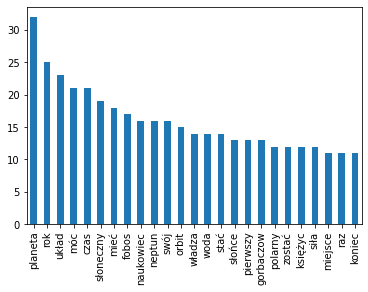

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD



# Count Vectorizer

vect = CountVectorizer(stop_words = stop_w,lowercase=True )  
vects = vect.fit_transform(corpus2)

# Select the first five rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:len(corpus2)]  
td.columns = vect.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, len(corpus)+1)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(100))
term_document_matrix['total_count'].plot.bar()

In [187]:
def printTopics(lsa,numberoftopisc=6):
  for index, component in enumerate(lsa.components_):
      zipped = zip(terms, component)
      top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:numberoftopisc]
      top_terms_list=list(dict(top_terms_key).keys())
      print("Topic "+str(index)+": ",top_terms_list)

tfidf = TfidfVectorizer(lowercase=True,
                        stop_words=stop_w,
                        ngram_range = (1,1),
                        )

# Fit and Transform the documents
train_data = tfidf.fit_transform(corpus2) 

num_components=10

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(train_data)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_transpose = lsa.components_.T

terms = tfidf.get_feature_names()
printTopics(lsa,6)



Topic 0:  ['fobos', 'planeta', 'woda', 'dziennikarz', 'układ', 'słoneczny']
Topic 1:  ['dziennikarz', 'woda', 'władza', 'gorbaczow', 'radziecki', 'państwo']
Topic 2:  ['polarny', 'woda', 'niedźwiedzi', 'grizzly', 'zabawa', 'niedźwiedzie']
Topic 3:  ['zabawa', 'owad', 'galpayage', 'piłka', 'toczeć', 'ból']
Topic 4:  ['woda', 'indie', 'bein', 'kali', 'rzeka', 'pitny']
Topic 5:  ['fobos', 'dziennikarz', 'księżyc', 'pływowy', 'mars', 'wynik']
Topic 6:  ['dziennikarz', 'planeta', 'słoneczny', 'układ', 'neptun', 'orbit']


In [ ]:

#https://machinelearninggeek.com/latent-semantic-indexing-using-scikit-learn/
#https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/
def wc_generator(lsa,numberoftopisc):
    for index, component in enumerate(lsa.components_):
      zipped = zip(terms, component)
      top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:numberoftopisc]
      wc = WordCloud(background_color="black",
                     width=5000,
                     height=3000, 
                     max_words=numberoftopisc,
                     relative_scaling=0.5,
                     normalize_plurals=False).generate_from_frequencies(dict(top_terms_key))
      plt.title(str(index))               
      plt.figure(figsize=(15,8))
      plt.imshow(wc)

wc_generator(lsa,10)